In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

CARGO LOS ARCHIVOS Y LOS CONVIERTO A DATAFRAME (LOS DOS)

In [13]:
df_vuelos = pd.read_csv("./Customer Flight Activity.csv")
df_loyalty = pd.read_csv("./Customer Loyalty History.csv")

BUSCO LOS DATOS GENERALES DEL DATAFRAME 

In [14]:
df_loyalty.shape

(16737, 16)

In [15]:
df_vuelos.shape

(405624, 10)

In [16]:
df_vuelos.sample(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
170667,189613,2017,11,0,0,0,0,0.0,0,0
306407,216467,2018,7,5,0,5,4105,410.0,0,0


In [17]:
df_loyalty.sample(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
11335,873886,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,52881.0,Married,Star,2618.33,Standard,2014,5,NaN,NaN
12919,839295,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,89094.0,Married,Star,4631.01,Standard,2013,7,NaN,NaN


VOY A UNIR LOS DOS DATAFRAME CON UN MERGE POR QUE TIENEN UNA COLUMNA EN COMUN 

In [18]:
# termine haciendo un inner merge 

df_unido_merge = df_loyalty.merge(df_vuelos, on= "Loyalty Number")
df_unido_merge


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


In [19]:
df_unido_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

BUSCAMOS NULOS

In [20]:
df_unido_merge.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

In [23]:
# vamos a ver que columnas tienen valores nulos en porcentaje
df_unido_merge.isnull().sum()[df_unido_merge.isnull().sum() > 0] / df_unido_merge.shape[0]*100

Salary                25.312112
Cancellation Year     87.657535
Cancellation Month    87.657535
dtype: float64

BUSCAMOS LOS DUPLICADOS

In [24]:
df_unido_merge.duplicated().sum()

1864

In [26]:
# Filtra las filas duplicadas en todo el DataFrame
duplicates = df_unido_merge[df_unido_merge.duplicated()]

# Verifica si hay duplicados en cada columna
for column in df_unido_merge.columns:
    if duplicates[column].any():
        print(f"La columna '{column}' contiene duplicados.")

La columna 'Loyalty Number' contiene duplicados.
La columna 'Country' contiene duplicados.
La columna 'Province' contiene duplicados.
La columna 'City' contiene duplicados.
La columna 'Postal Code' contiene duplicados.
La columna 'Gender' contiene duplicados.
La columna 'Education' contiene duplicados.
La columna 'Salary' contiene duplicados.
La columna 'Marital Status' contiene duplicados.
La columna 'Loyalty Card' contiene duplicados.
La columna 'CLV' contiene duplicados.
La columna 'Enrollment Type' contiene duplicados.
La columna 'Enrollment Year' contiene duplicados.
La columna 'Enrollment Month' contiene duplicados.
La columna 'Cancellation Year' contiene duplicados.
La columna 'Cancellation Month' contiene duplicados.
La columna 'Year' contiene duplicados.
La columna 'Month' contiene duplicados.


con lo siguiente voy a eliminar los duplicados que existen en la columna de loyalty number y mantener la primera fila 

In [29]:
df_unido_merge.drop_duplicates(subset=["Loyalty Number"], keep='first', inplace=True)

In [30]:
df_unido_merge.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
24,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,2017,1,9,1,10,1860,186.0,0,0
48,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2017,1,8,0,8,2960,296.0,0,0
72,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,2017,3,15,7,22,3960,396.0,0,0
96,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


In [31]:
df_unido_merge.shape

(16737, 25)

SACAMOS LOS ESTADISTICOS DE NUESTRAS COLUMNAS, SEPARADAS POR CATEGORICAS O NUMERICAS

In [32]:
# principales estadisticos de todas las columnas
print("columnas numericas son :")
display(df_unido_merge.describe().T)
print(".............")
print("columnas categoricas son :")
display(df_unido_merge.describe(include = "O").T)

columnas numericas son :


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00
Year,16737.0,2017.014758,0.120585,2017.00,2017.00,2017.00,2017.00,2018.00
Month,16737.0,1.205055,1.112146,1.00,1.00,1.00,1.00,12.00
Flights Booked,16737.0,2.860190,4.037829,0.00,0.00,0.00,6.00,21.00


.............
columnas categoricas son :


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [33]:
df_unido_merge.sample(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
168576,573505,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,83333.0,Single,Nova,5708.02,Standard,2014,3,NaN,NaN,2017,1,8,4,12,1596,159.0,0,0
177696,116207,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,62245.0,Married,Nova,6625.29,Standard,2017,1,2017.0,9.0,2017,1,0,0,0,0,0.0,0,0
113736,904501,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,57960.0,Married,Nova,2991.42,Standard,2016,11,NaN,NaN,2017,1,8,0,8,2768,276.0,0,0


## gestion de nulos para la columna de salario 
- la voy a gestionar con la mediana de la columna, pues la columna es de salario y con esta opcion no se vera afectada por valores atipicos

In [34]:
salario_mediana = df_unido_merge['Salary'].median()
df_unido_merge['Salary'].fillna(salario_mediana, inplace=True)

In [35]:
# vamos a ver que columnas tienen valores nulos en porcentaje
df_unido_merge.isnull().sum()[df_unido_merge.isnull().sum() > 0] / df_unido_merge.shape[0]*100

Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [37]:
df_unido_merge["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [38]:
df_unido_merge["Cancellation Month"].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

ca

In [48]:
columnas = ["Cancellation Year", "Cancellation Month"]

for columna in columnas:
    # Primero, relleno los valores NaN con ceros 
    df_unido_merge[columna] = df_unido_merge[columna].fillna(0)
    
    # Luego, convierto los valores a tipo de datos integer
    df_unido_merge[columna] = df_unido_merge[columna].astype(int)

In [49]:
df_unido_merge.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int64
Cancellation Month               int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

voy a pasar la columna de cancellation month de integer a que cada valor tenga los meses del año 

In [50]:
# Diccionario para mapear números de mes a nombres de mes
meses_dict1 = {
    0: 'desconocido',
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar la transformación a la columna "month"
df_unido_merge['Cancellation Month'] = df_unido_merge['Cancellation Month'].map(meses_dict1)

# Mostrar el DataFrame resultante
df_unido_merge.sample(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
360624,748198,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,50375.0,Divorced,Star,7995.41,Standard,2015,2,0,desconocido,2017,1,7,0,7,1148,114.0,0,0
107448,463882,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,80846.0,Married,Nova,2846.65,Standard,2013,10,0,desconocido,2017,1,13,0,13,1651,165.0,0,0
216480,978712,Canada,British Columbia,Vancouver,V6E 3D9,Female,High School or Below,71630.0,Married,Nova,11638.90,Standard,2018,10,0,desconocido,2017,1,0,0,0,0,0.0,0,0


cambio la columna de month, la paso de ser un integer a string con los meses del año 

In [53]:



# Diccionario para mapear números de mes a nombres de mes
meses_dict = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar la transformación a la columna "month"
df_unido_merge['Month'] = df_unido_merge['Month'].map(meses_dict)

# Mostrar el DataFrame resultante
df_unido_merge.sample(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
114312,864288,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,89394.0,Married,Nova,3020.42,Standard,2015,10,0,desconocido,2017,enero,6,0,6,1896,189.0,0,0
147144,805008,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,46801.0,Married,Nova,4717.63,Standard,2016,12,0,desconocido,2017,enero,11,0,11,1034,103.0,0,0
55776,433678,Canada,Ontario,Toronto,P1J 8T7,Male,Master,105487.0,Divorced,Aurora,7805.31,Standard,2013,3,0,desconocido,2017,enero,12,0,12,2652,265.0,0,0


In [54]:
df_unido_merge['Month'].value_counts()

enero         15578
febrero         711
marzo            82
julio            51
diciembre        45
abril            43
septiembre       42
octubre          40
mayo             39
junio            39
noviembre        37
agosto           30
Name: Month, dtype: int64

In [55]:
df_unido_merge.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [57]:
df_unido_merge.sample(4)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
291240,689112,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,65762.0,Married,Star,2895.52,Standard,2012,5,0,desconocido,2017,enero,3,0,3,858,85.0,0,0
214368,370539,Canada,Ontario,Toronto,M2M 6J7,Female,Bachelor,47602.0,Married,Nova,10937.18,Standard,2013,12,0,desconocido,2017,diciembre,4,4,8,4120,412.0,421,34
299808,623569,Canada,Alberta,Edmonton,T3G 6Y6,Female,College,73455.0,Single,Star,3623.45,Standard,2012,10,0,desconocido,2017,enero,0,0,0,0,0.0,0,0
58848,436235,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,54961.0,Married,Aurora,8083.92,Standard,2015,11,0,desconocido,2017,enero,0,0,0,0,0.0,0,0


In [61]:
# Agrupa por año y mes y cuenta el número de vuelos reservados en cada combinación año-mes
vuelos_por_anio_mes = df_unido_merge.groupby(['Year', 'Month']).size()
vuelos_por_anio_mes

Year  Month     
2017  abril            25
      agosto           14
      diciembre        27
      enero         15555
      febrero         688
      julio            24
      junio            17
      marzo            66
      mayo             23
      noviembre        18
      octubre          16
      septiembre       17
2018  abril            18
      agosto           16
      diciembre        18
      enero            23
      febrero          23
      julio            27
      junio            22
      marzo            16
      mayo             16
      noviembre        19
      octubre          24
      septiembre       25
dtype: int64

In [62]:
# Convertir la serie a DataFrame
vuelos_por_anio_mes_df = vuelos_por_anio_mes.reset_index()
vuelos_por_anio_mes_df.columns = ['Year', 'Month', 'Cantidad de vuelos reservados']

# Muestra el DataFrame resultante
print(vuelos_por_anio_mes_df)

    Year       Month  Cantidad de vuelos reservados
0   2017       abril                             25
1   2017      agosto                             14
2   2017   diciembre                             27
3   2017       enero                          15555
4   2017     febrero                            688
5   2017       julio                             24
6   2017       junio                             17
7   2017       marzo                             66
8   2017        mayo                             23
9   2017   noviembre                             18
10  2017     octubre                             16
11  2017  septiembre                             17
12  2018       abril                             18
13  2018      agosto                             16
14  2018   diciembre                             18
15  2018       enero                             23
16  2018     febrero                             23
17  2018       julio                             27
18  2018    

# VISUALIZACION

Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

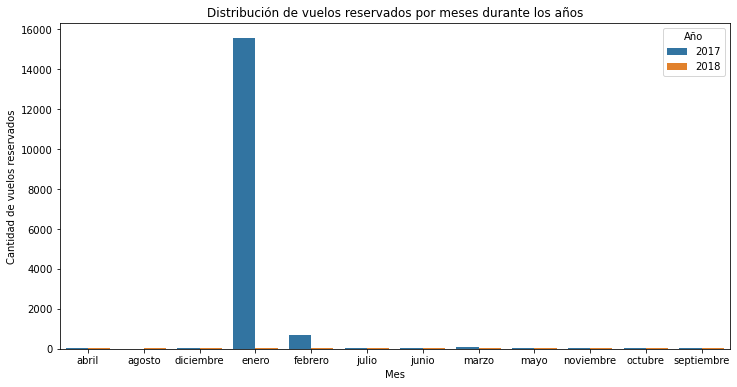

In [65]:
# Crear gráfico de barras agrupado por mes y año
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Cantidad de vuelos reservados', hue='Year', data=vuelos_por_anio_mes_df)
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.title('Distribución de vuelos reservados por meses durante los años')
plt.legend(title='Año')
plt.show()

 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [66]:
# Calcular la correlación entre la distancia de los vuelos y los puntos acumulados por los clientes lo hare con el coeficiente de correlación de Pearson, 
#que es una medida de la relación lineal entre dos variables continuas.

correlacion = df_unido_merge['Distance'].corr(df_unido_merge['Points Accumulated'])

# Mostrar la correlación
print("Correlación entre la distancia de los vuelos y los puntos acumulados:", correlacion)

Correlación entre la distancia de los vuelos y los puntos acumulados: 0.9991670019563716


el valor es cercano a 1 lo que indica una correlacion positiva fuerte (cuando una variable sube la otra tambien)

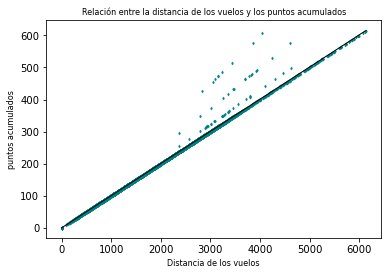

In [68]:
sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_unido_merge, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 3} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Distancia de los vuelos", fontsize = 8)
plt.ylabel("puntos acumulados", fontsize = 8)

# ponemos título a la gráfica
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados", fontsize = 8);

3. ¿Cuál es la distribución de los clientes por provincia o estado?

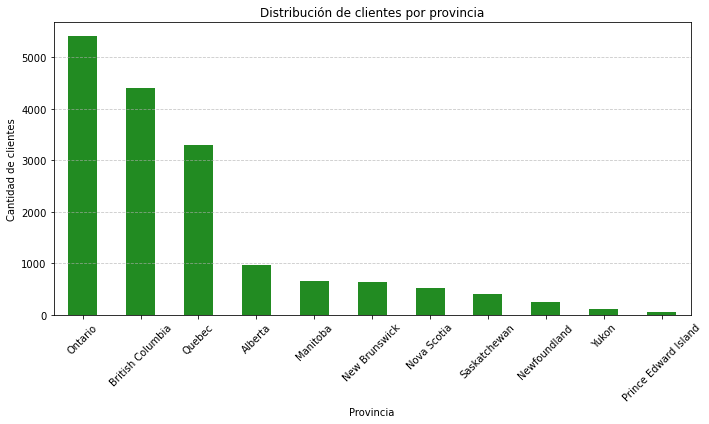

In [69]:
# Calcular el recuento de clientes por provincia o estado
clientes_por_provincia = df_unido_merge['Province'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
clientes_por_provincia.plot(kind='bar', color='forestgreen')
plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [70]:
df_unido_merge['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [71]:
#Agrupar el salario promedio por nivel educativo
salario_promedio_por_educacion = df_unido_merge.groupby('Education')['Salary'].mean().sort_values()
salario_promedio_por_educacion

Education
High School or Below     61071.718670
Bachelor                 72451.061575
College                  73455.000000
Master                  103757.848425
Doctor                  178608.897820
Name: Salary, dtype: float64

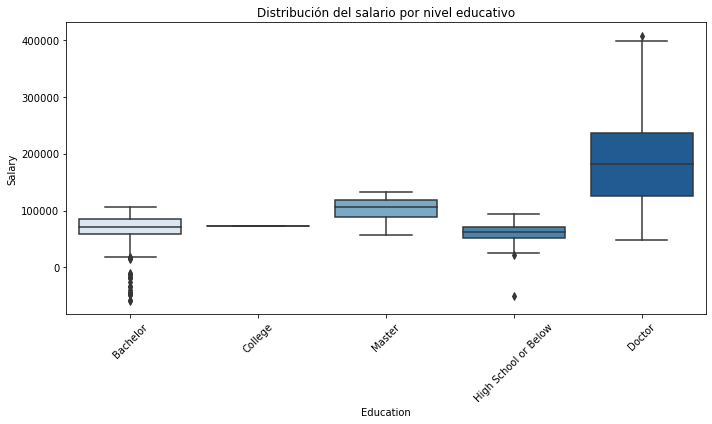

In [72]:
# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Salary', data=df_unido_merge, palette='Blues')
plt.title('Distribución del salario por nivel educativo')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [73]:
df_unido_merge.head(1)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,desconocido,2017,enero,0,0,0,0,0.0,0,0


 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [74]:
# Contar el número de clientes por tipo de tarjeta de fidelidad
clientes_por_tarjeta = df_unido_merge['Loyalty Card'].value_counts()
clientes_por_tarjeta


Star      7637
Nova      5671
Aurora    3429
Name: Loyalty Card, dtype: int64

In [75]:

# Calcular la proporción de clientes para cada tipo de tarjeta de fidelidad
proporcion_clientes_por_tarjeta = clientes_por_tarjeta / len(df_unido_merge)* 100
proporcion_clientes_por_tarjeta

Star      45.629444
Nova      33.883014
Aurora    20.487543
Name: Loyalty Card, dtype: float64

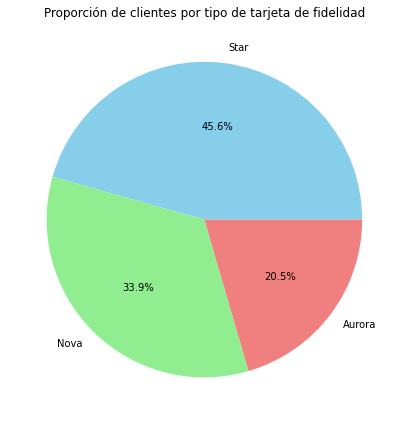

In [77]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
proporcion_clientes_por_tarjeta.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.ylabel('')
plt.tight_layout()
plt.show()

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

<Figure size 720x432 with 0 Axes>

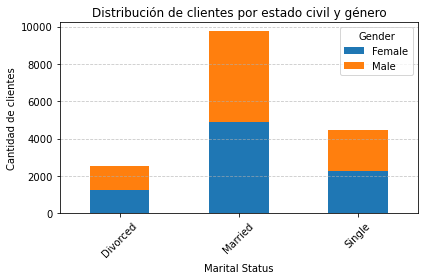

In [78]:
# Agrupar los clientes por estado civil y género y contar cuántos hay en cada grupo
distribucion_clientes = df_unido_merge.groupby(['Marital Status', 'Gender']).size().unstack()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
distribucion_clientes.plot(kind='bar', stacked=True)
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Marital Status')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

FASE 3- EVALUACION DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO

-Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
 reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
 1. Preparación de Datos:
 Preparación de Datos:
 Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
 
 2. Análisis Descriptivo:
 Análisis Descriptivo:
 Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
 número de vuelos reservados para cada grupo.
 3. Prueba Estadística:
 Prueba Estadística:
 Normas
 Normas
 Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
 niveles educativos.


In [79]:
# 1- preparacion de datos, filtramos el data frame original y sacamos solo las columnas que nos importan
vuelos_edu= df_unido_merge.loc[:, ["Flights Booked", "Education"]]
vuelos_edu.head(2)

,Flights Booked,Education
0,0,Bachelor
24,9,College


In [80]:
# 2- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
stats_por_educacion = vuelos_edu.groupby('Education').describe()
stats_por_educacion

Flights Booked                                          \
                              count      mean       std  min  25%  50%  75%   
Education                                                                     
Bachelor                    10475.0  2.840477  4.015799  0.0  0.0  0.0  6.0   
College                      4238.0  2.875885  4.021617  0.0  0.0  0.0  6.0   
Doctor                        734.0  2.956403  4.223724  0.0  0.0  0.0  6.0   
High School or Below          782.0  2.882353  4.105706  0.0  0.0  0.0  6.0   
Master                        508.0  2.962598  4.252459  0.0  0.0  0.0  6.0   

                            
                       max  
Education                   
Bachelor              21.0  
College               21.0  
Doctor                20.0  
High School or Below  18.0  
Master                19.0

In [81]:
vuelos_edu["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

3- Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [82]:
from scipy.stats import f_oneway

In [83]:
# Dividir los datos en grupos según los diferentes niveles educativos
grupos_educativos = [vuelos_edu[vuelos_edu['Education'] == nivel]['Flights Booked'] for nivel in vuelos_edu['Education'].unique()]  # todo los uniques que encuentre en educacion los convierte a en un nivel 
                                #con esto encuentra el número de vuelos reservados para un nivel educativo específico.
# por lo tanto grupos_educativos será una lista de series, donde cada serie contendrá el número de vuelos reservados para un nivel educativo específico.


In [84]:
                                
# Realiza la prueba de ANOVA
p_value = f_oneway(*grupos_educativos).pvalue
print("Valor p de la prueba ANOVA:", p_value)


# Interpretación de los resultados
if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente para concluir que hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")



# *Los resultados que obtenemos son:**

# **Estadístico F:** El estadístico F es el resultado principal de ANOVA. Representa la relación entre la variabilidad entre los grupos y la variabilidad dentro de los grupos. Un valor grande de F sugiere que al menos un par de medias son diferentes.

#Valor p:** El valor p asociado al estadístico F indica la probabilidad de obtener un valor de estadístico F tan extremo como el observado, asumiendo que las medias de todos los grupos son iguales. Un valor p pequeño (< 0.05) sugiere que puedes rechazar la hipótesis nula de igualdad de medias.



Valor p de la prueba ANOVA: 0.8973374849784482
No se puede rechazar la hipótesis nula. No hay evidencia suficiente para concluir que hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.


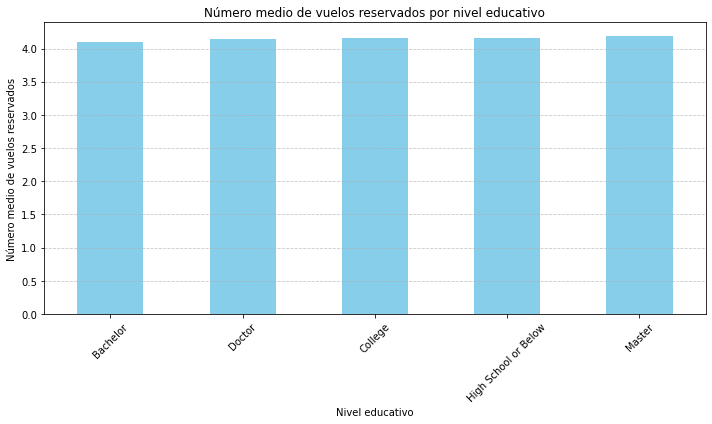

In [56]:


# Agrupar los datos por nivel educativo y calcular el número medio de vuelos reservados
reservas_por_educacion = vuelos_edu.groupby('Education')['Flights Booked'].mean().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
reservas_por_educacion.plot(kind='bar', color='skyblue')
plt.title('Número medio de vuelos reservados por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Número medio de vuelos reservados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()